In [1]:
from physical_constants import *
from solver import *

import numpy as np

step_r = 1e3 # cm

# Neutron Star

A star is in equilibrium when the inward gravitational pressure is balanced by the outward pressure from thermonuclear fusion reactions in its core. Once hydrogen and helium fusion are exhausted, the star begins to collapse. For stars with an initial mass less than eight solar masses, the temperature is insufficient to ignite carbon and oxygen fusion, leading to the expulsion of the outer layers. The remaining core becomes a compact object composed of a degenerate electron gas. This core does not collapse further due to the Pauli exclusion principle, which states that electrons cannot all occupy the lowest energy state and must fill states of increasing energy. The resulting non-zero electron velocity generates an outward pressure that counteracts gravitational collapse. This object, known as a white dwarf, emits thermal radiation and has a radius of about 10,000 kilometers. However, if the core’s mass exceeds the Chandrasekhar limit of 1.4 solar masses, the degenerate pressure is insufficient to prevent collapse.

For stars with an initial mass greater than eight solar masses, the temperature becomes high enough to ignite fusion of heavier elements up to iron. Since there are no exothermic reactions beyond iron, the core eventually collapses and the density increases to the point at which electrons are captured by nuclei, producing neutrons. The outer layers are expelled in a supernova explosion. If the remaining core has a mass of about two to three solar masses, it becomes a neutron star, composed of degenerate neutron gas, with a radius of about 10 kilometers. In fact, once a critical density is reached, nuclei are not able to retain neutrons anymore and free neutrons form a dense, incompressible and degenerate core. If the core’s mass exceeds three solar masses, it continues to collapse, forming a black hole. 

In this notebook, we will study how to model neutron stars by finding their equation of state and integrate the system of ordinary differential equations, which is composed by a mass equation
$$ \frac{dm}{dr} = \frac{4 \pi r^2 \epsilon(r)}{r} $$
and a pressure equation
$$ \quad \frac{d p}{dr} = \frac{G \epsilon(r) m(r)}{c^2 r^2} ~, \qquad \frac{d p}{dr} = \frac{G \epsilon(r) m(r)}{c^2 r^2} \Big ( 1 + \frac{p(r)}{\epsilon(r)} \Big ) \Big ( 1 + \frac{4 \pi r^3 p(r)}{m(r)c^2} \Big ) \Big ( 1 - \frac{2 G m(r)}{c^2 r} \Big) ~,$$
where the first one is calculated in Newtonian regime and the second one using general relativity. The boundary conditions are
$$p(r = R_{object})= 0 ~, \quad p(r = 0) = p_0 ~, \quad m(r = 0) = 0 ~.$$


Our goal is to estimate the mass and the radius of these astrophysical objects, once an equation of state is given.

### Non-relativistic degenerate ideal Fermi gas of neutron

The first simple model we are going to consider is a degenerate ($T=0$) ideal (non-interacting) Fermi gas of neutrons. It is described by statistical mechanics, in which the phase space distribution function is given by the Fermi-Dirac statistics
$$ f(E) = \Big ( \exp(\frac{E-\mu}{k_B T}) + 1 \Big )^{-1} \quad \xrightarrow{T \rightarrow 0} \quad f(E) = \begin{cases} 1 & E \leq E_F \\ 0 & E \geq E_F \end{cases} ~,$$
where $E_F$ is the Fermi energy.

The physical quantities we are interested in are number density, energy density and pressure:
$$ n = g \int \frac{d^3 p}{(2 \pi \hbar^3)} f(E) ~, \quad \epsilon = n m c^2 + g \int \frac{d^3 p}{(2 \pi \hbar^3)} f(E) E ~, \quad p = g \int \frac{d^3 p}{(2 \pi \hbar^3)} f(E) \frac{p^2}{3E} ~. $$

To solve the system of ordinary differential equations, we need an equation of state, i.e. a relation between pressure and energy density. In the non-relativistic limit ($k_F≪ m c$), the equation of state is

$$ p = \frac{\hbar^2}{15 \pi^2 m_n} \Big ( \frac{3 \pi^2}{m_n c^2}\Big)^{5/3} \epsilon^{5/3} = K_{nonrel} \epsilon^{5/3}$$

In the following, you will find solutions of this system.

#### Fixed pressure

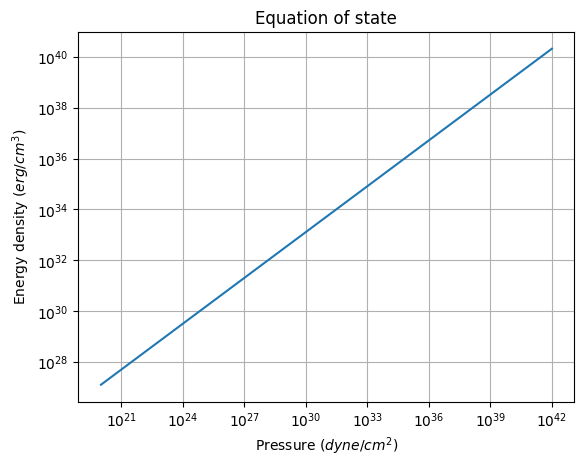

In [20]:
# Load equation of state
EoS = EquationOfState()
file_path = "data/fermi_nonrel.csv"
EoS.load_from_file(file_path)
eos = EoS.interpolate() 
EoS.plot()

In [21]:
# Newtonian system with initial pressures of 10^32
p0 = 1e32
solver = SolverTOVSinglePressure(eos, relativity_corrections=False)
solver.solve(step_r, p0)
newton_r, newton_m, newton_p = solver.get()
solver.print_mass_radius()

The radius is R = 27.45 km
The mass is M = 0.1671 M_sun


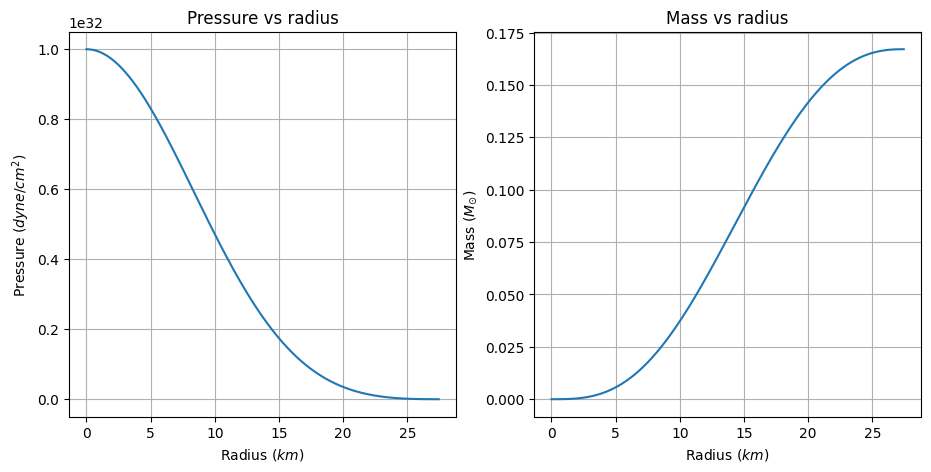

In [22]:
solver.plot()

In [23]:
# TOV system with initial pressures of 10^32
p0 = 1e32
solver = SolverTOVSinglePressure(eos, relativity_corrections=True)
solver.solve(step_r, p0)
tov_r, tov_m, tov_p = solver.get()
solver.print_mass_radius()

The radius is R = 27.14 km
The mass is M = 0.1613 M_sun


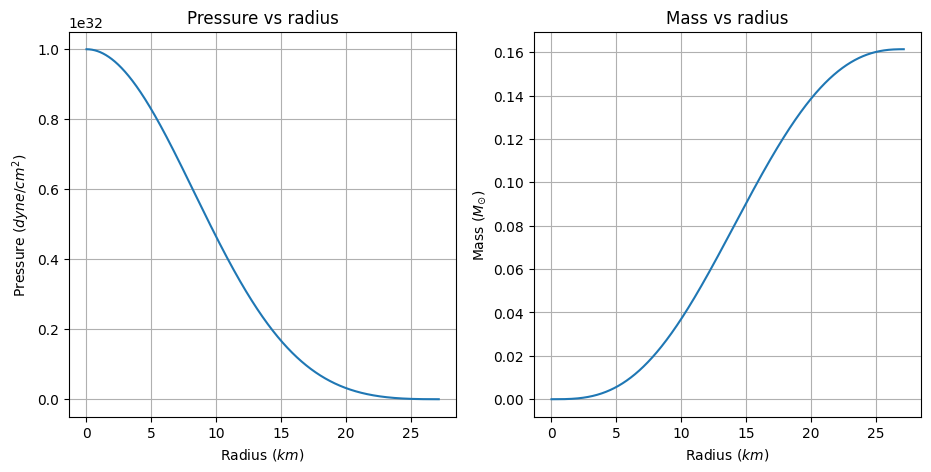

In [24]:
solver.plot()

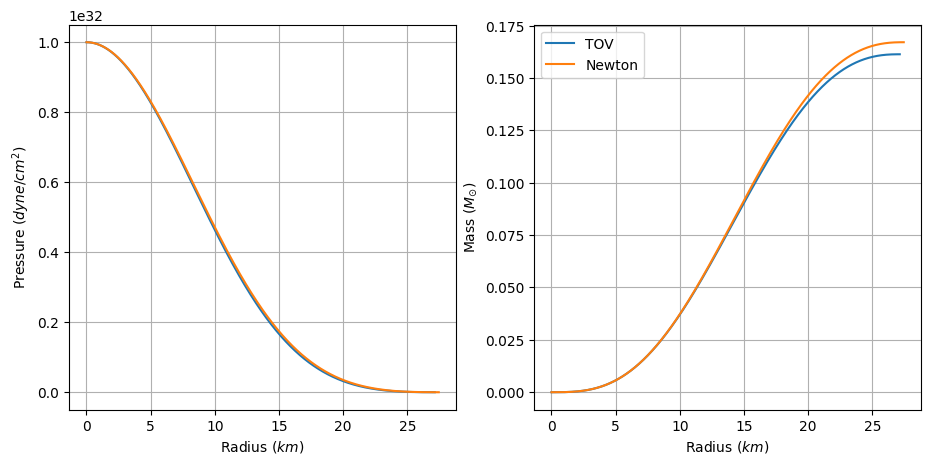

In [25]:
# Comparison between Newtonian and TOV systems
fig, axs = plt.subplots(1, 2, figsize=(11, 5))
axs[0].plot(tov_r, tov_p, label="TOV")
axs[0].plot(newton_r, newton_p, label="Newton")
axs[0].set_xlabel("Radius ($km$)")
axs[0].set_ylabel("Pressure ($dyne / cm^2$)")
axs[0].grid(True)
axs[1].plot(tov_r, tov_m, label="TOV")
axs[1].plot(newton_r, newton_m, label="Newton")
axs[1].set_xlabel("Radius ($km$)")
axs[1].set_ylabel("Mass ($M_{\\odot}$)")
axs[1].grid(True)
plt.legend()
plt.show()

#### Running pressures

In [26]:
# Newtonian system with running initial pressures logarithmically from 31 to 34
initial_pressures = np.logspace(31, 34, 40)
solver = SolverTOVRangePressure(eos, relativity_corrections=False)
solver.solve(step_r, initial_pressures)
newton_r, newton_m, p = solver.get()
solver.print_max_mass()

The maximum mass is M = 0.665 M_sun, 
which corresponds to a radius of R = 17.32 km
and a central pressure of P = 1e+34 dyne/cm^2


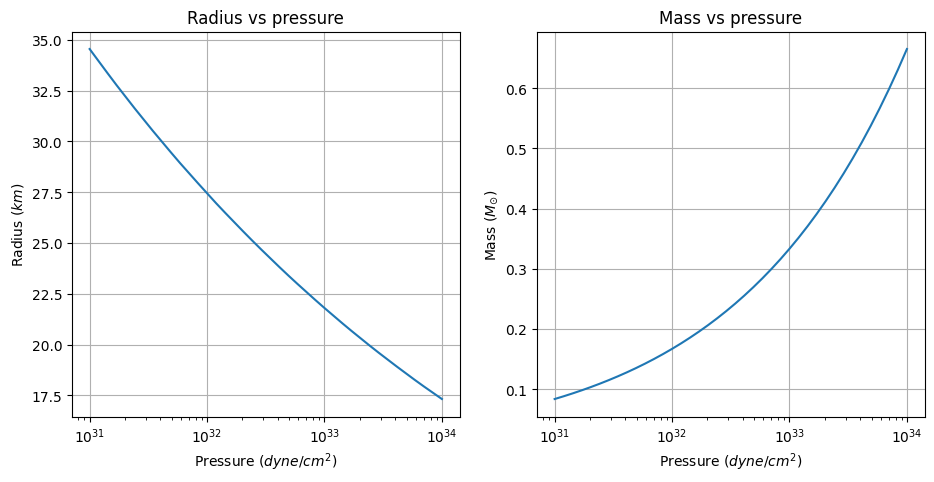

In [27]:
solver.plot_MRvsP()

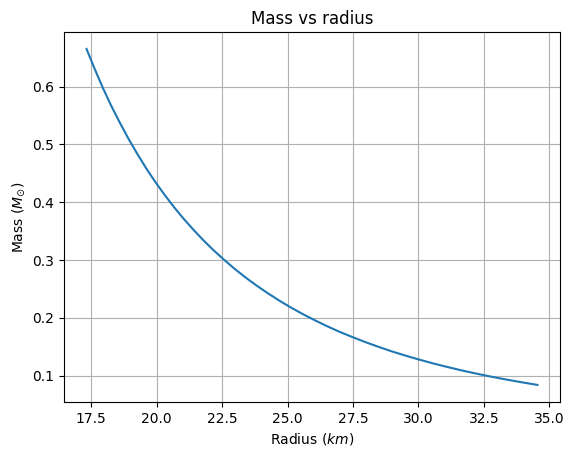

In [28]:
solver.plot_MvsR()

In [29]:
# TOV system with running initial pressures logarithmically from 31 to 34
initial_pressures = np.logspace(31, 34, 40)
solver = SolverTOVRangePressure(eos, relativity_corrections=True)
solver.solve(step_r, initial_pressures)
tov_r, tov_m, p = solver.get()
solver.print_max_mass()

The maximum mass is M = 0.539 M_sun, 
which corresponds to a radius of R = 16.21 km
and a central pressure of P = 1e+34 dyne/cm^2


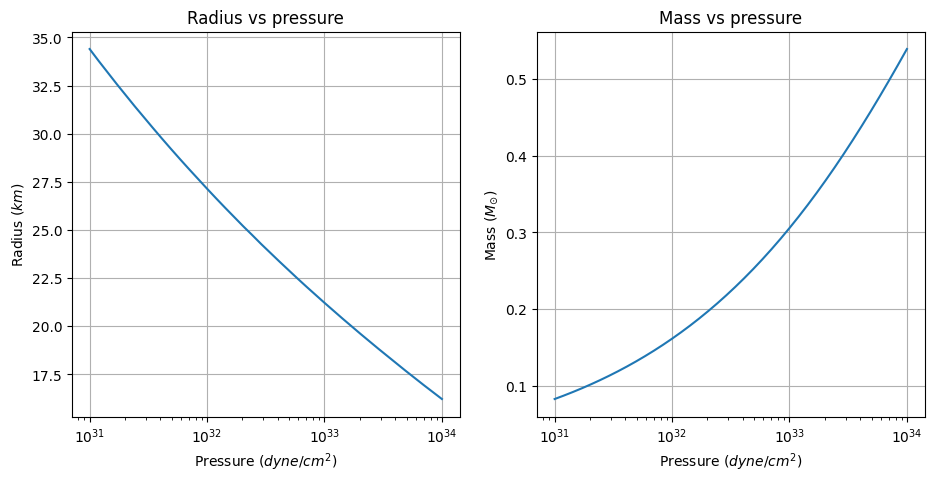

In [30]:
solver.plot_MRvsP()

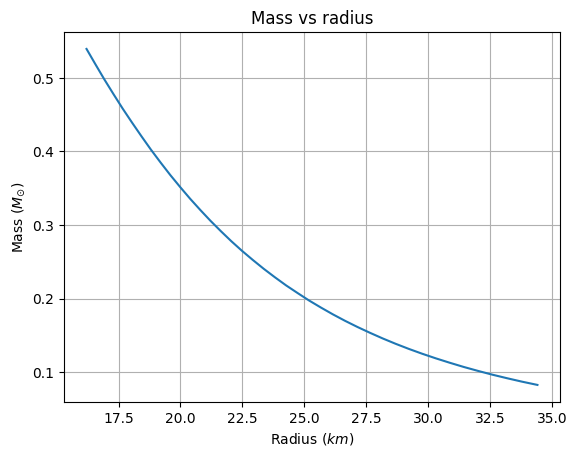

In [31]:
solver.plot_MvsR()

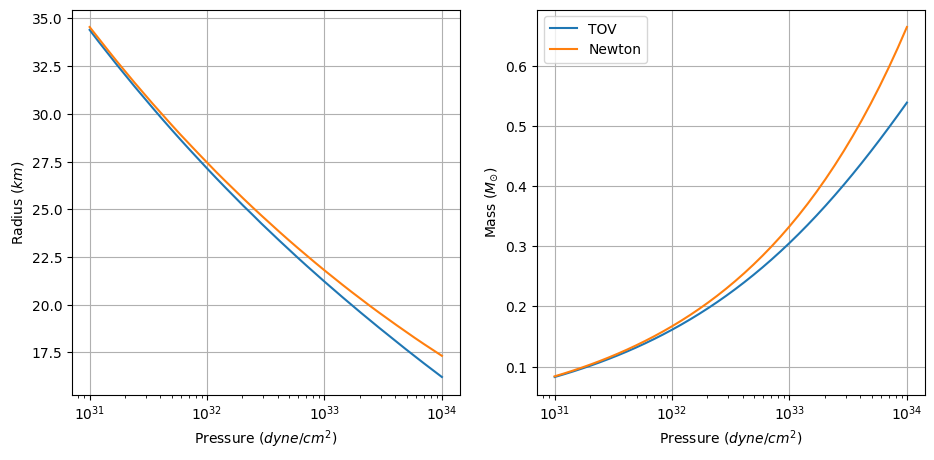

In [32]:
# Comparison between Newtonian and TOV systems
fig, axs = plt.subplots(1, 2, figsize=(11, 5))
axs[0].plot(initial_pressures, tov_r, label="TOV")
axs[0].plot(initial_pressures, newton_r, label="Newton")
axs[0].set_ylabel("Radius ($km$)")
axs[0].set_xlabel("Pressure ($dyne / cm^2$)")
axs[0].set_xscale("log")
axs[0].grid(True)
axs[1].plot(initial_pressures, tov_m, label="TOV")
axs[1].plot(initial_pressures, newton_m, label="Newton")
axs[1].set_ylabel("Mass ($M_{\\odot}$)")
axs[1].set_xlabel("Pressure ($dyne / cm^2$)")
axs[1].set_xscale("log")
axs[1].grid(True)
plt.legend()
plt.show()

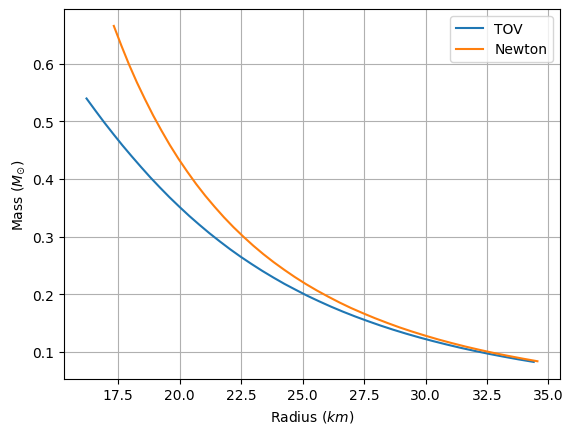

In [33]:
plt.plot(tov_r, tov_m, label="TOV")
plt.plot(newton_r, newton_m, label="Newton")
plt.xlabel("Radius ($km$)")
plt.ylabel("Mass ($M_{\\odot}$)")
plt.grid(True)
plt.legend()
plt.show()

### Generic degenerate ideal Fermi gas of neutron

If we want to solve the generic equation of state without non-relativistic limit, we proceed by expressing pressure and energy density in terms of Fermi momentum $k_F$

$$ p(x) = \frac{\epsilon_0}{24} \Big ( (2 x^3 - 3 x)(1 + x^2)^{1/2} + 3 \sinh^{-1} (x) \Big) $$
$$ \epsilon(x) = n m_n c^2 + \frac{\epsilon_0}{8} \Big ( (2 x^3 + x)(1 + x^2)^{1/2} - \sinh^{-1} (x) \Big) $$

where $\epsilon_0 = \frac{m_n^4 c^5}{\pi^2 \hbar^3}$ and $x = \frac{k_F}{m_n c}$, and then, for each pressure p, by finding x using a root-finding algorithm in the pressure expression (or precisely in p(x) - p) and finally putting in the energy density expression. The results are shown below.

#### Fixed pressure

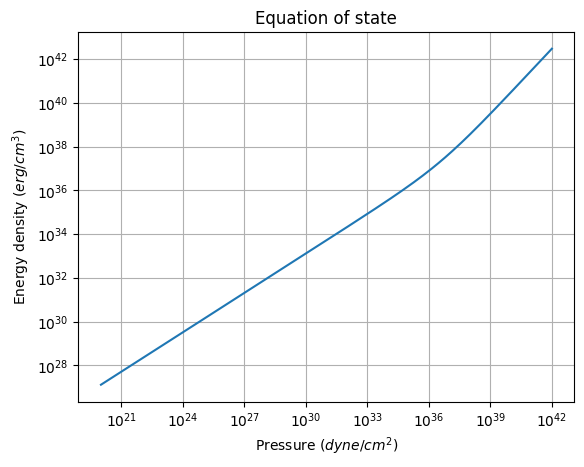

In [34]:
# Load equation of state
EoS = EquationOfState()
file_path = "data/fermi_gen.csv"
EoS.load_from_file(file_path)
eos= EoS.interpolate() 
EoS.plot()

In [36]:
# Newtonian system with initial pressures of 10^34
p0 = 1e34
solver = SolverTOVSinglePressure(eos, relativity_corrections=False)
solver.solve(step_r, p0)
newton_r, newton_m, newton_p = solver.get()
solver.print_mass_radius()

The radius is R = 16.85 km
The mass is M = 0.5984 M_sun


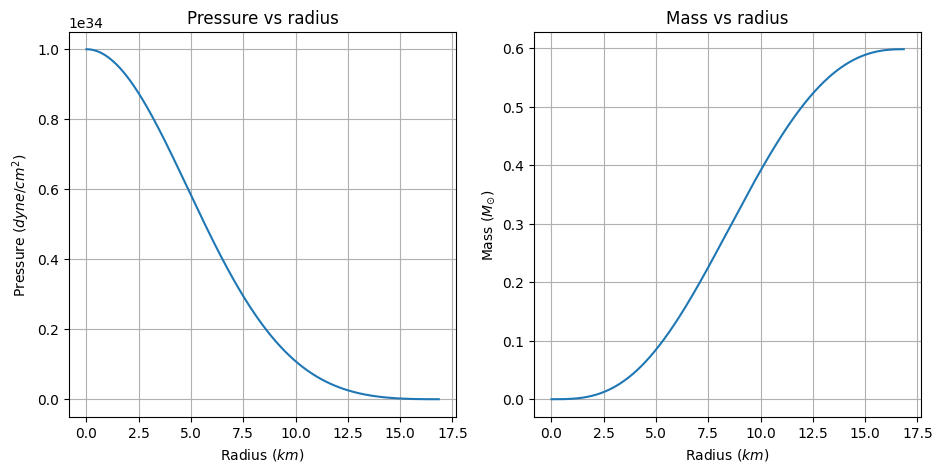

In [37]:
solver.plot()

In [38]:
# TOV system with initial pressures of 10^34
p0 = 1e34
solver = SolverTOVSinglePressure(eos, relativity_corrections=True)
solver.solve(step_r, p0)
tov_r, tov_m, tov_p = solver.get()
solver.print_mass_radius()

The radius is R = 15.84 km
The mass is M = 0.4912 M_sun


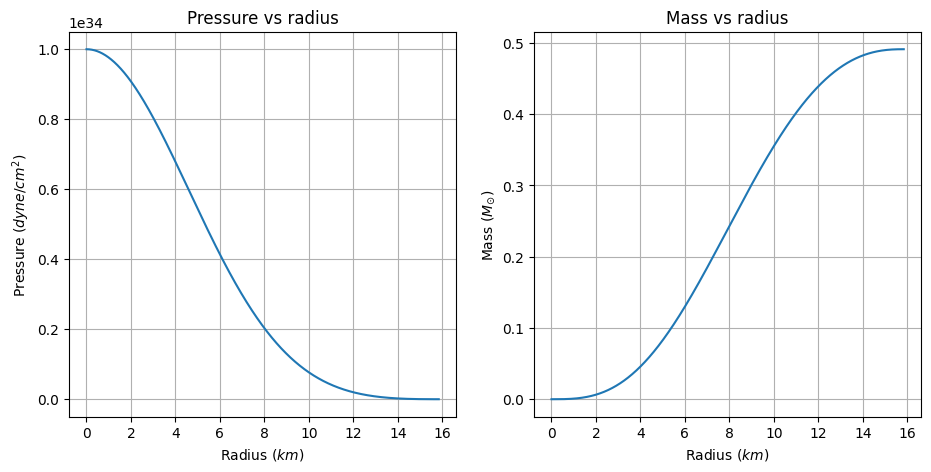

In [39]:
solver.plot()

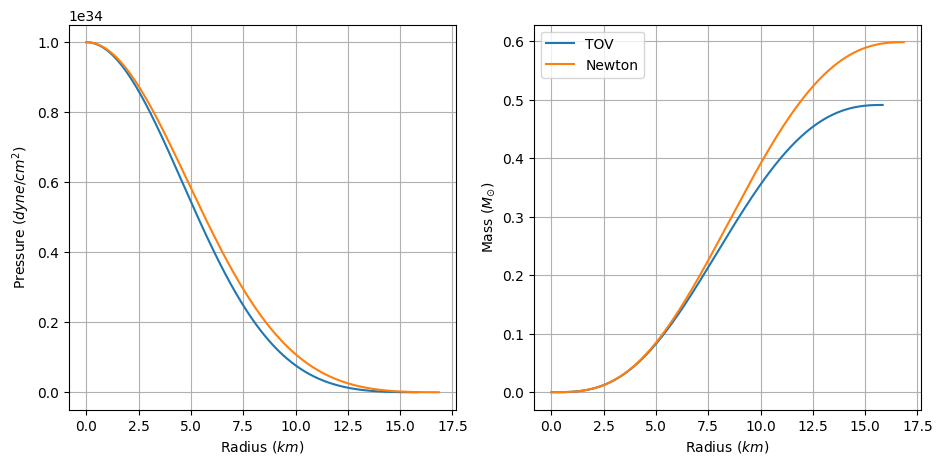

In [40]:
# Comparison between Newtonian and TOV systems
fig, axs = plt.subplots(1, 2, figsize=(11, 5))
axs[0].plot(tov_r, tov_p, label="TOV")
axs[0].plot(newton_r, newton_p, label="Newton")
axs[0].set_xlabel("Radius ($km$)")
axs[0].set_ylabel("Pressure ($dyne / cm^2$)")
axs[0].grid(True)
axs[1].plot(tov_r, tov_m, label="TOV")
axs[1].plot(newton_r, newton_m, label="Newton")
axs[1].set_xlabel("Radius ($km$)")
axs[1].set_ylabel("Mass ($M_{\\odot}$)")
axs[1].grid(True)
plt.legend()
plt.show()

#### Running pressures

In [41]:
# Newtonian system with running initial pressures logarithmically from 31 to 41
initial_pressures = np.logspace(31, 41, 40)
solver = SolverTOVRangePressure(eos, relativity_corrections=False)
solver.solve(step_r, initial_pressures)
newton_r, newton_m, p = solver.get()
solver.print_max_mass()

The maximum mass is M = 1.647 M_sun, 
which corresponds to a radius of R = 7.01 km
and a central pressure of P = 7.896522868499733e+36 dyne/cm^2


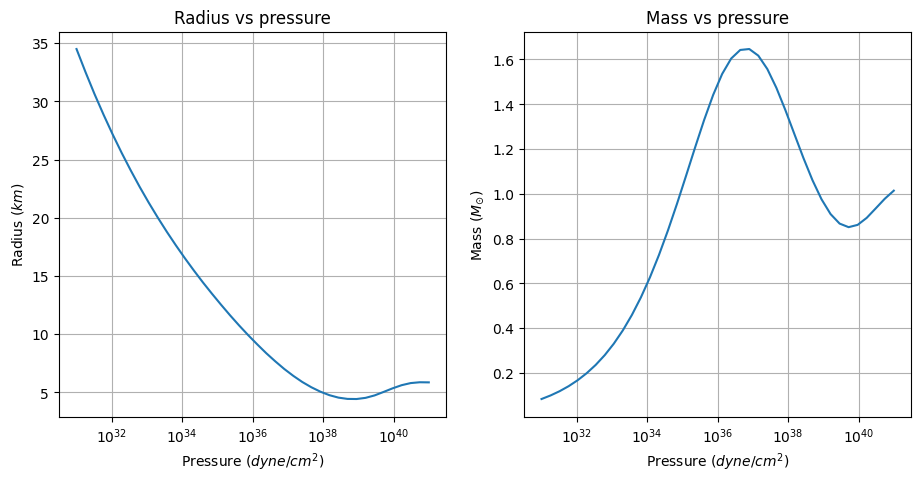

In [42]:
solver.plot_MRvsP()

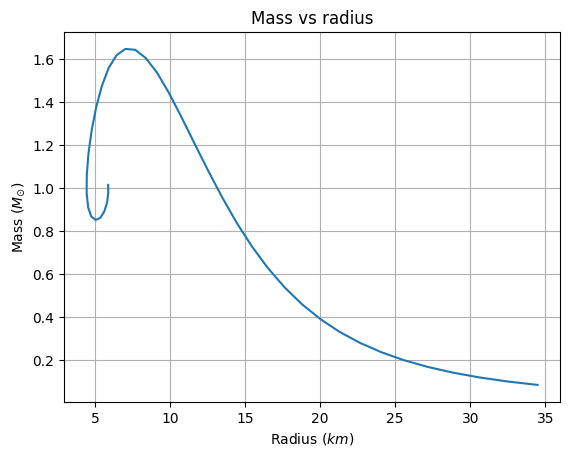

In [44]:
solver.plot_MvsR()

In [45]:
# TOV system with running initial pressures logarithmically from 31 to 41
initial_pressures = np.logspace(31, 41, 40)
solver = SolverTOVRangePressure(eos, relativity_corrections=True)
solver.solve(step_r, initial_pressures)
tov_r, tov_m, p = solver.get()
solver.print_max_mass()

The maximum mass is M = 0.71 M_sun, 
which corresponds to a radius of R = 8.97 km
and a central pressure of P = 4.124626382901331e+35 dyne/cm^2


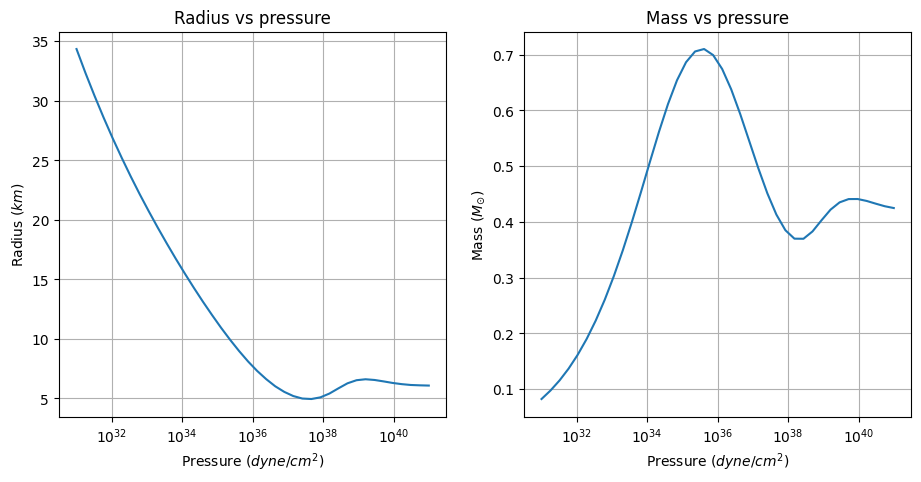

In [46]:
solver.plot_MRvsP()

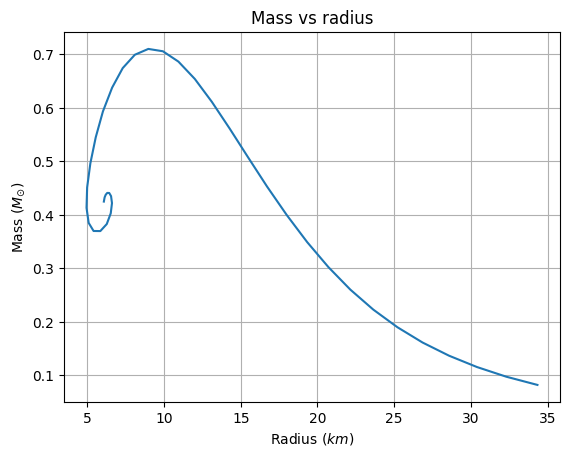

In [47]:
solver.plot_MvsR()

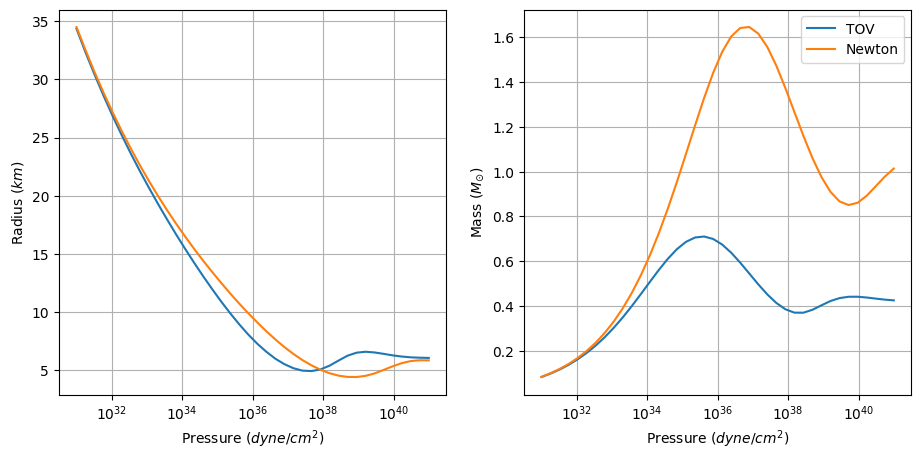

In [48]:
# Comparison between Newtonian and TOV systems
fig, axs = plt.subplots(1, 2, figsize=(11, 5))
axs[0].plot(initial_pressures, tov_r, label="TOV")
axs[0].plot(initial_pressures, newton_r, label="Newton")
axs[0].set_ylabel("Radius ($km$)")
axs[0].set_xlabel("Pressure ($dyne / cm^2$)")
axs[0].set_xscale("log")
axs[0].grid(True)
axs[1].plot(initial_pressures, tov_m, label="TOV")
axs[1].plot(initial_pressures, newton_m, label="Newton")
axs[1].set_ylabel("Mass ($M_{\\odot}$)")
axs[1].set_xlabel("Pressure ($dyne / cm^2$)")
axs[1].set_xscale("log")
axs[1].grid(True)
plt.legend()
plt.show()

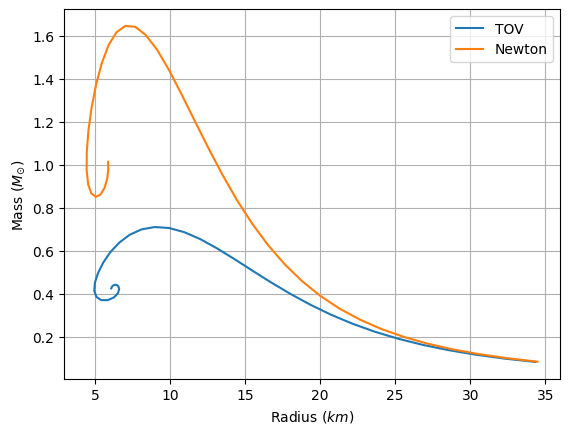

In [49]:
plt.plot(tov_r, tov_m, label="TOV")
plt.plot(newton_r, newton_m, label="Newton")
plt.xlabel("Radius ($km$)")
plt.ylabel("Mass ($M_{\\odot}$)")
plt.grid(True)
plt.legend()
plt.show()

### Degenerate ideal Fermi gas of neutron, protons and electrons

We can improve our model by considering that neutrons decay into protons, electrons and neutrinos
$$ n \rightarrow e^- + p + \bar \nu_e$$
Neutrinos can escape from the neutron star, but protons and electrons need to be taken into account. Furthermore, protons, neutron and electrons react via weak interactions 
$$p + e^- \leftrightarrow n + \nu_e ~.$$

Therefore, we can find the equation of state by computing pressure and energy density for each particle species $$ p_{tot} = \sum_i p_i ~, \quad p_i = \frac{\epsilon_0}{24} \Big ( (2 x_i^3 - 3 x_i)(1 + x_i^2)^{1/2} + 3 \sinh^{-1} (x_i) \Big) ~,$$
$$ \epsilon_{tot} = \sum_i \epsilon_i ~, \quad \epsilon_i = n_i m_i c^2 + \frac{\epsilon_0}{8} \Big ( (2 x_i^3 + x_i)(1 + x_i^2)^{1/2} - \sinh^{-1} (x_i) \Big)~, $$ 
keeping in mind that beta equilibrium constrains Fermi momenta to be 
$$ \mu_n = \mu_p + \mu_e \quad \Rightarrow \quad \sqrt{k_n^2 c^2 + m_n^2 c^4} = \sqrt{k_p^2 c^2 + m_p^2 c^4} + \sqrt{k_e^2 c^2 + m_e^2 c^4} $$ 
and charge neutrality implies $k_p = k_e$ so that $$ \sqrt{k_n^2 c^2 + m_n^2 c^4} = 2 \sqrt{k_p^2 c^2 + m_p^2 c^4} ~. $$ 

Furthermore, another feature to consider is that for pressure $p > 3.038 \times 10^24 dyne/cm^2$ neutrons are present in the model and below that pressure, only electrons and protons are present. The results are shown below.

#### Fixed pressure

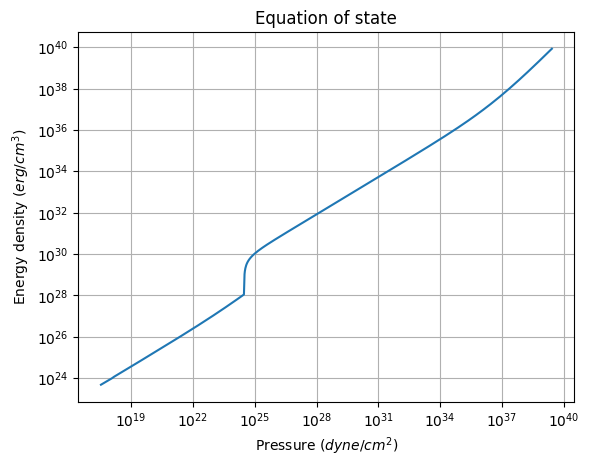

In [52]:
# Load equation of state
EoS = EquationOfState()
file_path = "data/fermi_npe.csv"
EoS.load_from_file(file_path)
eos = EoS.interpolate() 
EoS.plot()

In [53]:
# Newtonian system with initial pressures of 10^35
p0 = 1e35
solver = SolverTOVSinglePressure(eos, relativity_corrections=False)
solver.solve(step_r, p0)
newton_r, newton_m, newton_p = solver.get()
solver.print_mass_radius()

The radius is R = 12.87 km
The mass is M = 1.0183 M_sun


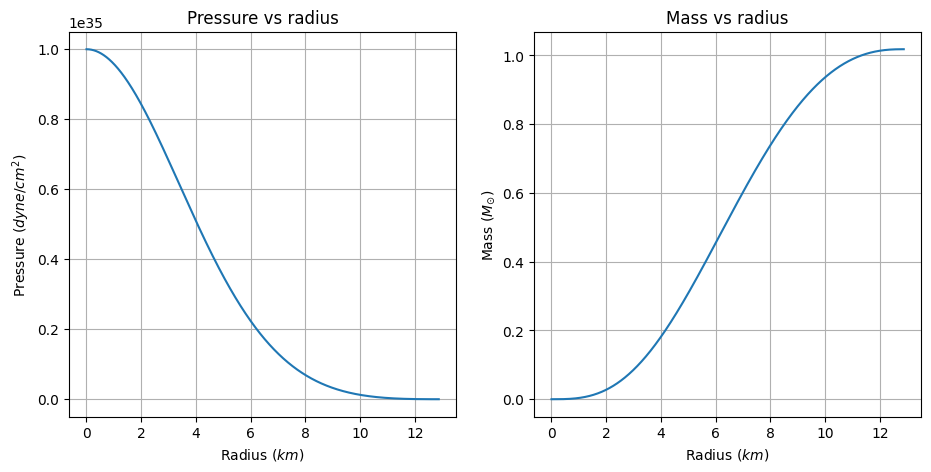

In [54]:
solver.plot()

In [56]:
# TOV system with initial pressures of 10^35
p0 = 1e35
solver = SolverTOVSinglePressure(eos, relativity_corrections=True)
solver.solve(step_r, p0)
tov_r, tov_m, tov_p = solver.get()
solver.print_mass_radius()

The radius is R = 11.33 km
The mass is M = 0.6691 M_sun


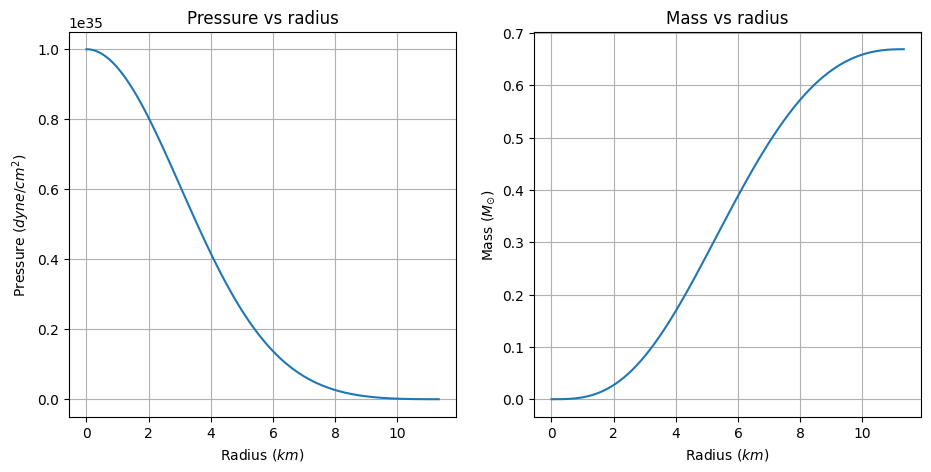

In [57]:
solver.plot()

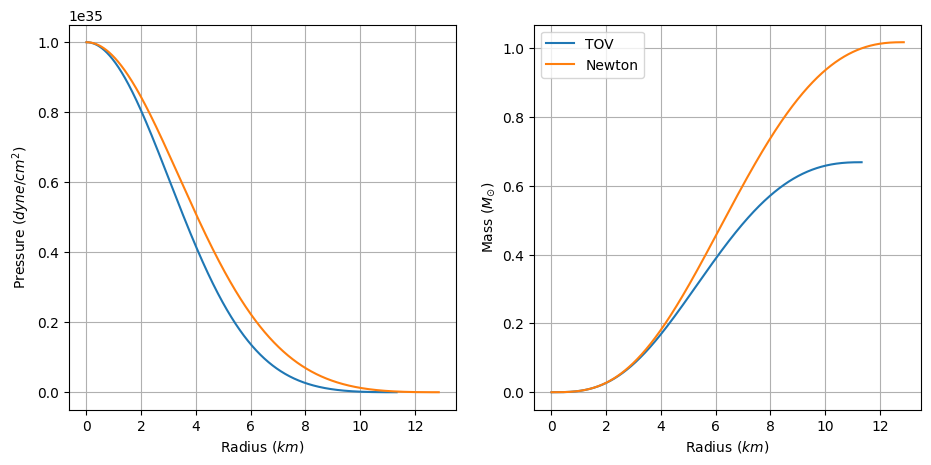

In [58]:
# Comparison between Newtonian and TOV systems
fig, axs = plt.subplots(1, 2, figsize=(11, 5))
axs[0].plot(tov_r, tov_p, label="TOV")
axs[0].plot(newton_r, newton_p, label="Newton")
axs[0].set_xlabel("Radius ($km$)")
axs[0].set_ylabel("Pressure ($dyne / cm^2$)")
axs[0].grid(True)
axs[1].plot(tov_r, tov_m, label="TOV")
axs[1].plot(newton_r, newton_m, label="Newton")
axs[1].set_xlabel("Radius ($km$)")
axs[1].set_ylabel("Mass ($M_{\\odot}$)")
axs[1].grid(True)
plt.legend()
plt.show()

#### Running pressures

In [59]:
# Newtonian system with running initial pressures logarithmically from 22 to 39
solver = SolverTOVRangePressure(eos, relativity_corrections=False)
step_r = 1e5 # cm
initial_pressures = np.logspace(22, 30, 20)
solver.solve(step_r, initial_pressures)
step_r = 1e4 # cm
initial_pressures = np.logspace(30, 39, 20)
solver.solve(step_r, initial_pressures)
newton_r, newton_m, p = solver.get()
solver.print_max_mass()

The maximum mass is M = 3.87 M_sun, 
which corresponds to a radius of R = 11988.0 km
and a central pressure of P = 1.6237767391887176e+26 dyne/cm^2


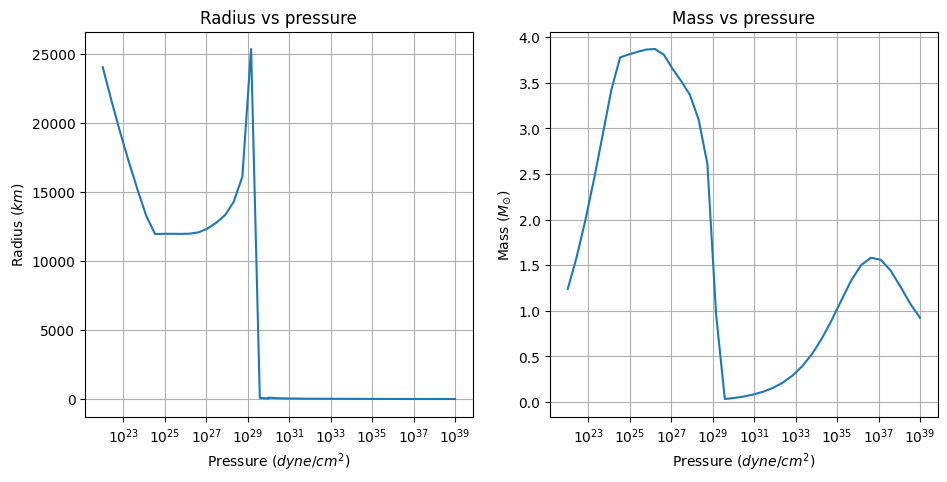

In [60]:
solver.plot_MRvsP()

In [61]:
# TOV system with running initial pressures logarithmically from 22 to 39
solver = SolverTOVRangePressure(eos, relativity_corrections=True)
step_r = 1e5 # cm
initial_pressures_1 = np.logspace(22, 30, 20)
solver.solve(step_r, initial_pressures_1)
step_r = 1e4 # cm
initial_pressures_2 = np.logspace(30, 39, 20)
solver.solve(step_r, initial_pressures_2)
tov_r, tov_m, initial_pressures = solver.get()
solver.print_max_mass()
step_r = 1e3 # cm

The maximum mass is M = 3.862 M_sun, 
which corresponds to a radius of R = 11981.0 km
and a central pressure of P = 1.6237767391887176e+26 dyne/cm^2


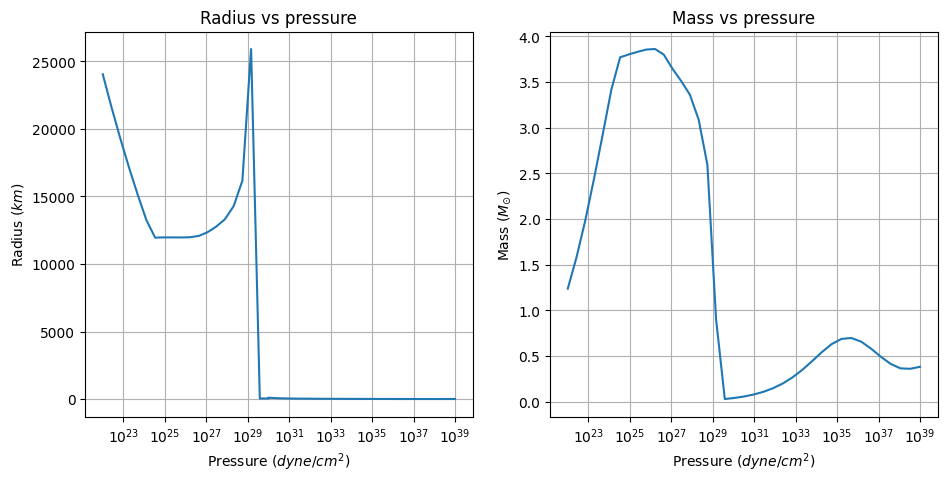

In [62]:
solver.plot_MRvsP()

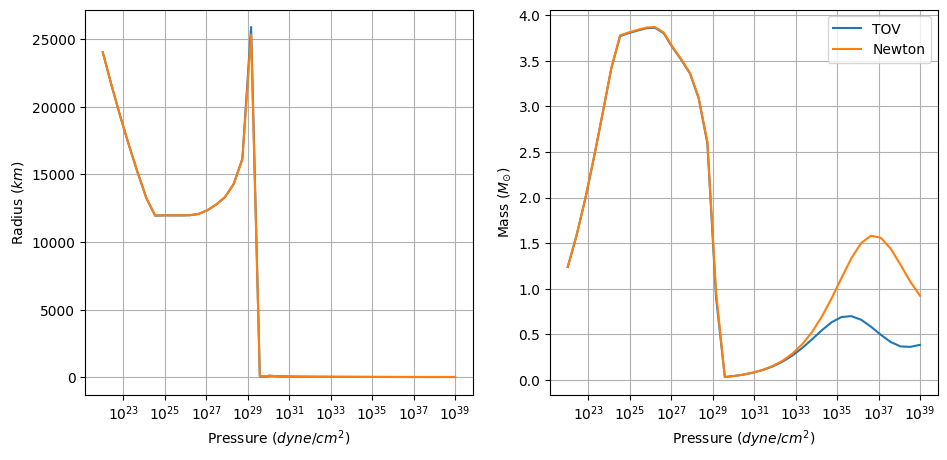

In [63]:
# Comparison between Newtonian and TOV systems
fig, axs = plt.subplots(1, 2, figsize=(11, 5))
axs[0].plot(initial_pressures, tov_r, label="TOV")
axs[0].plot(initial_pressures, newton_r, label="Newton")
axs[0].set_ylabel("Radius ($km$)")
axs[0].set_xlabel("Pressure ($dyne / cm^2$)")
axs[0].set_xscale("log")
axs[0].grid(True)
axs[1].plot(initial_pressures, tov_m, label="TOV")
axs[1].plot(initial_pressures, newton_m, label="Newton")
axs[1].set_ylabel("Mass ($M_{\\odot}$)")
axs[1].set_xlabel("Pressure ($dyne / cm^2$)")
axs[1].set_xscale("log")
axs[1].grid(True)
plt.legend()
plt.show()

### Empirical interactions

So far, we have considered only models without interactions. However, we know that nuclear interactions must be taken into account in order to give a realistic model. 

We begin by introducing empirical interactions for symmetric matter, which roughly consists of adding terms to the energy density which depend on fit parameters

$$ \frac{\epsilon(n)}{n} = m_n c^2 + <E_0> u^{2/3} + \frac{A}{2} u + \frac{B}{\sigma +1} u^\sigma ~,$$
where $u = \frac{n}{n_0}$ and $A, B, \sigma$ are parameters of the fit.

After some algebra, considering also asymmetric matter and pure neutron star, we can find pressure and energy density as functions of number density 
$$ p(n) = n_0 \Big ( \frac{2}{3} <E_0> u^{5/3} + \frac{A}{2} u^2 + \frac{B \sigma}{\sigma + 1} u^{\sigma + 1} + (2^{2/3} - 1) <E_0> (\frac{2}{3} u^{5/3} - u^2) + S_0 u^2 \Big ) ~, $$
$$ \epsilon(n) = n \Big ( m_n c^2 + 2^{2/3} <E_0> u^{2/3} + \frac{A}{2} u + \frac{B}{\sigma + 1} u^\sigma + (S_0 - (2^{2/3} - 1)<E_0>) u \Big ) ~.$$


The results are shown below.

#### Fixed pressure

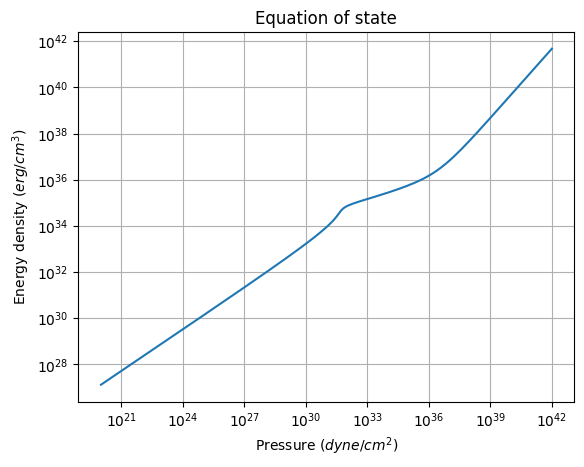

In [64]:
# Load equation of state
EoS = EquationOfState()
file_path = "data/emp.csv"
EoS.load_from_file(file_path)
eos = EoS.interpolate() 
EoS.plot()

In [65]:
# TOV system with initial pressures of 10^35
p0 = 1e35
solver = SolverTOVSinglePressure(eos, relativity_corrections=True)
solver.solve(step_r, p0)
tov_r, tov_m, tov_p = solver.get()
solver.print_mass_radius()

The radius is R = 13.64 km
The mass is M = 1.8652 M_sun


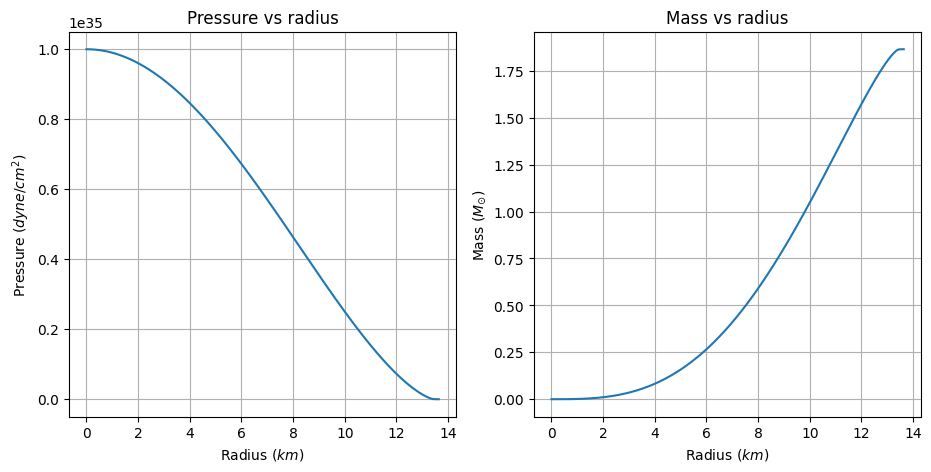

In [66]:
solver.plot()

#### Running pressures

In [67]:
# TOV system with running initial pressures logarithmically from 32.5 to 40
initial_pressures = np.logspace(32.5, 40, 40)
solver = SolverTOVRangePressure(eos, relativity_corrections=True)
solver.solve(step_r, initial_pressures)
newton_r, newton_m, p = solver.get()
solver.print_max_mass()

The maximum mass is M = 2.791 M_sun, 
which corresponds to a radius of R = 12.59 km
and a central pressure of P = 9.152473108773856e+35 dyne/cm^2


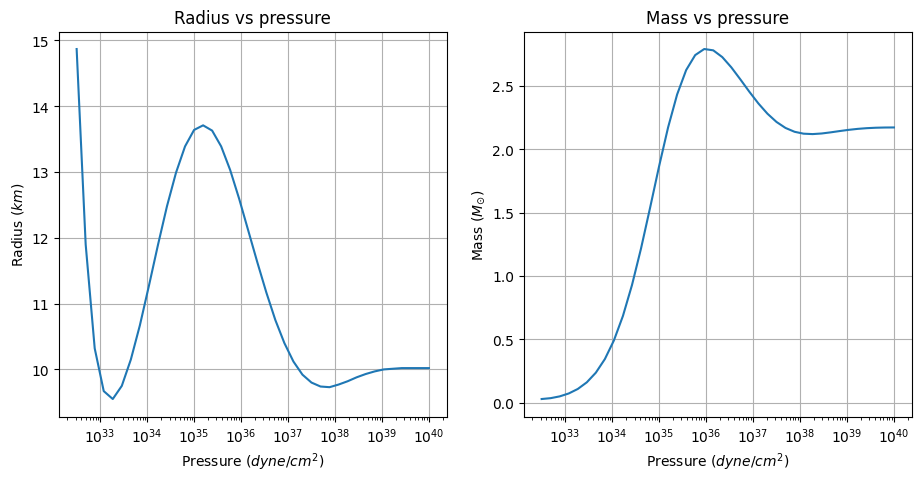

In [68]:
solver.plot_MRvsP()

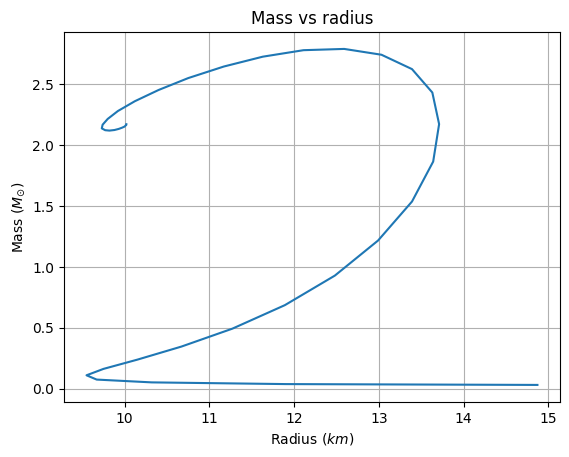

In [69]:
solver.plot_MvsR()

### Skyrme Hatree-Fock interactions

The second interacting model we are considering is based on Skyrme interaction calculated applying the Hartree-Fock method. 

Consider a quantum system described by plain-waves functions
$$ \psi_\alpha (x) = \frac{1}{\sqrt{V}} e^{i k x} \chi_{iso} \chi_{spin} $$
treated with the self-consistent Hartree-Fock equation
$$\epsilon_\alpha \psi_\alpha (x) = \hat t \psi_\alpha (x) + \sum_{\alpha'} d^3 y ~ \psi_\alpha^\dagger (y) V(x, y) (\psi_{\alpha'} (y) \psi_{\alpha} (x) - \psi_{\alpha} (y) \psi_{\alpha'} (x))$$
and Skyrme–type parameterisation for the potential
$$ V(x, y) = \delta^3(x - y) \Big ( \frac{t_3 n}{6} - t_0 \Big) ~, $$
where $t_0$ describes attractive part and $n t_3$ describes the repulsive part of the interaction. After some algebra, we can find pressure and energy density as functions of number density 

$$ p(n) = \frac{2(3 \pi^2 \hbar^3)^{2/3}}{10 m_n} n^{5/3} + \frac{t_3}{12} n^3 - \frac{t_0}{4}n^2 ~, $$
$$ \epsilon(n) = m_n n c^2 + \frac{3(3 \pi^2 \hbar^3)^{2/3}}{10 m_n} n^{5/3} + \frac{t_3}{24} n^3 - \frac{t_0}{4}n^2 . $$

The results are shown below.

#### Fixed pressure

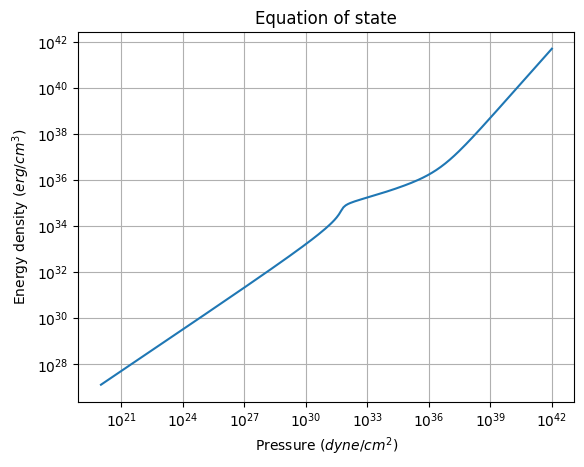

In [70]:
# Load equation of state
EoS = EquationOfState()
file_path = "data/sky.csv"
EoS.load_from_file(file_path)
eos= EoS.interpolate() 
EoS.plot()

In [71]:
# TOV system with initial pressures of 10^35
p0 = 1e35
solver = SolverTOVSinglePressure(eos, relativity_corrections=True)
solver.solve(step_r, p0)
tov_r, tov_m, tov_p = solver.get()
solver.print_mass_radius()

The radius is R = 11.97 km
The mass is M = 1.4848 M_sun


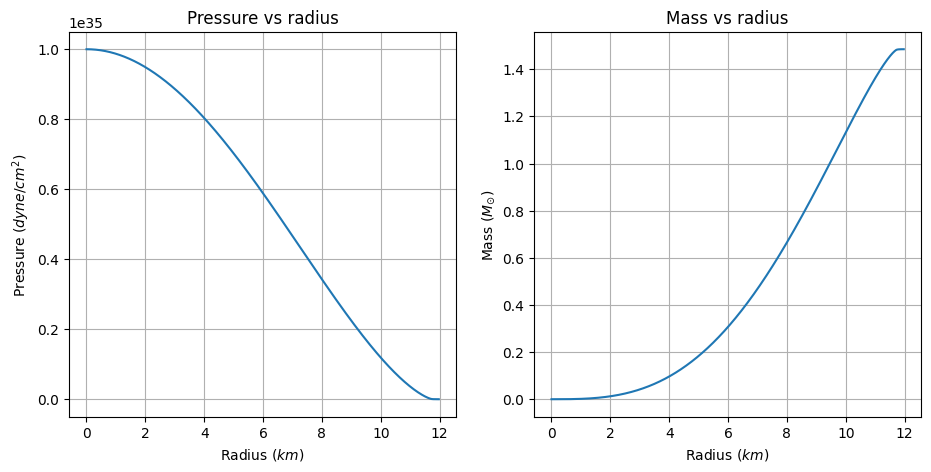

In [72]:
solver.plot()

#### Running pressures

In [74]:
# TOV system with running initial pressures logarithmically from 32.5 to 40
initial_pressures = np.logspace(32.5, 40, 40)
solver = SolverTOVRangePressure(eos, relativity_corrections=True)
solver.solve(step_r, initial_pressures)
newton_r, newton_m, p = solver.get()
solver.print_max_mass()

The maximum mass is M = 2.437 M_sun, 
which corresponds to a radius of R = 10.88 km
and a central pressure of P = 1.4251026703029964e+36 dyne/cm^2


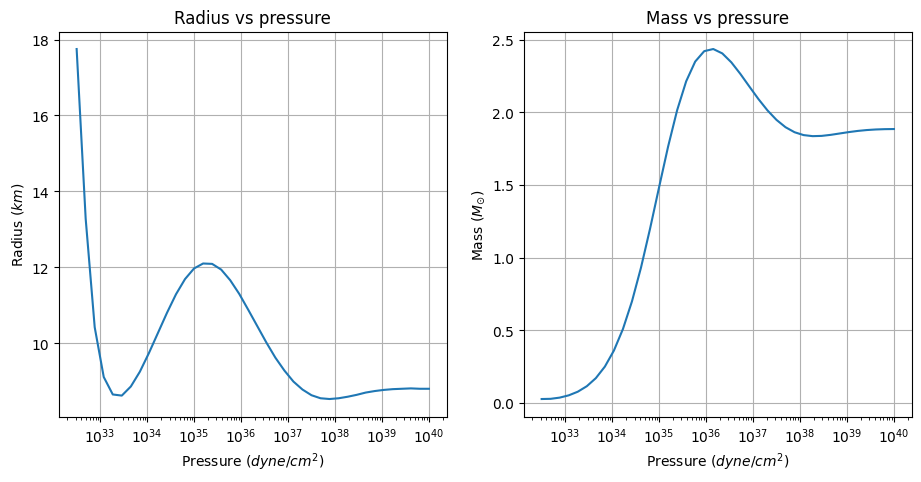

In [75]:
solver.plot_MRvsP()

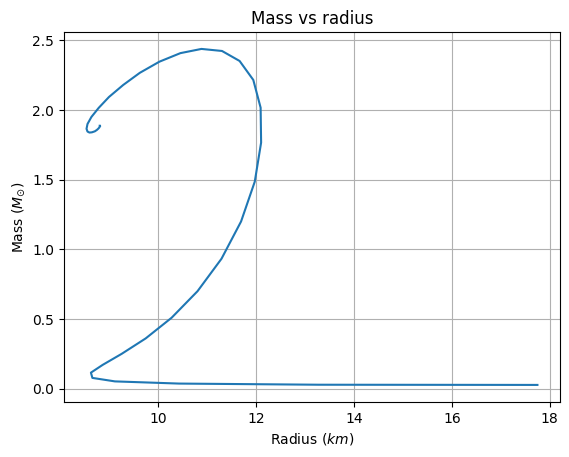

In [76]:
solver.plot_MvsR()

### Comparison

Here, as a summary, we have gathered together all the equations of state and mass versus radius plots.

#### Comparison plots

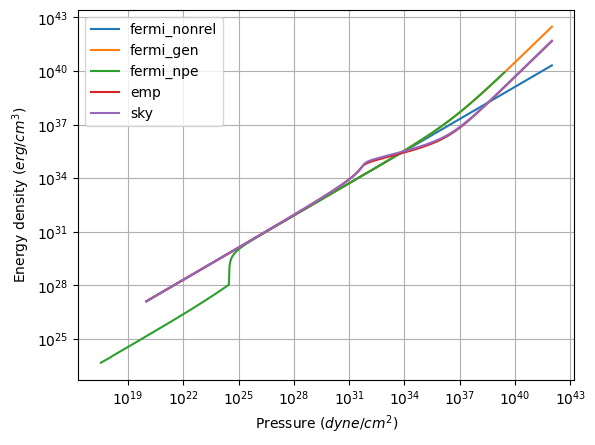

In [78]:
# Comparison of equations of state
file_names = ["fermi_nonrel", "fermi_gen", "fermi_npe", "emp", "sky"]

for file_name in file_names:
    file_path = "data/" + file_name + ".csv"
    EoS = EquationOfState()
    EoS.load_from_file(file_path)
    n, pressures, energy_densities = EoS.get()

    plt.plot(pressures, energy_densities, label=file_name)

plt.ylabel("Energy density ($erg / cm^3$)")
plt.yscale("log")
plt.xlabel("Pressure ($dyne / cm^2$)")
plt.xscale("log")
plt.legend()
plt.grid(True)
plt.show()

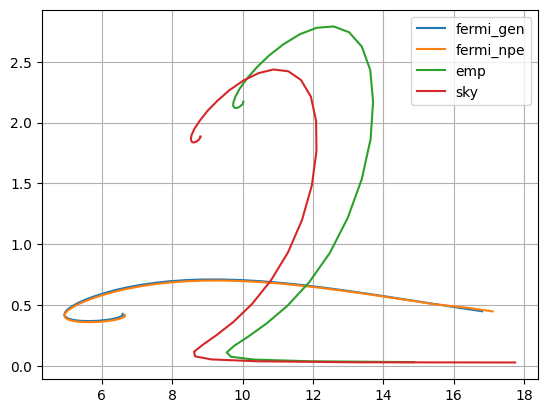

In [82]:
# Generic degenerate ideal Fermi gas of neutron
file_path = "data/fermi_gen.csv"
EoS = EquationOfState()
EoS.load_from_file(file_path)
eos= EoS.interpolate() 
initial_pressures = np.logspace(33.8, 39.3, 40)
solver = SolverTOVRangePressure(eos, relativity_corrections=True)
solver.solve(step_r, initial_pressures)
r, m, p = solver.get()
plt.plot(r, m, label="fermi_gen")

# Degenerate ideal Fermi gas of neutron, protons and electrons
file_path = "data/fermi_npe.csv"
EoS = EquationOfState()
EoS.load_from_file(file_path)
eos= EoS.interpolate() 
initial_pressures = np.logspace(33.8, 39.3, 40)
solver = SolverTOVRangePressure(eos, relativity_corrections=True)
solver.solve(step_r, initial_pressures)
r, m, p = solver.get()
plt.plot(r, m, label="fermi_npe")

# Empirical interactions
file_path = "data/emp.csv"
EoS = EquationOfState()
EoS.load_from_file(file_path)
eos= EoS.interpolate() 
initial_pressures = np.logspace(32.5, 40, 40)
solver = SolverTOVRangePressure(eos, relativity_corrections=True)
solver.solve(step_r, initial_pressures)
r, m, p = solver.get()
plt.plot(r, m, label="emp")

# Skyrme Hatree-Fock interactions
file_path = "data/sky.csv"
EoS = EquationOfState()
EoS.load_from_file(file_path)
eos= EoS.interpolate() 
initial_pressures = np.logspace(32.5, 40, 40)
solver = SolverTOVRangePressure(eos, relativity_corrections=True)
solver.solve(step_r, initial_pressures)
r, m, p = solver.get()
plt.plot(r, m, label="sky")

plt.grid(True)
plt.legend()
plt.show()

### References

I. Sagert, M. Hempel, C. Greiner, & J.Schaffner–Bielich, Compact Stars for Undergraduates

R. Silbar & S. Reddy, Neutron Stars for Undergraduates